In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import numpy.polynomial.polynomial as poly
from collections import OrderedDict
import matplotlib.patches as mpatches
%matplotlib inline

In [2]:
from Definitions import *

In [3]:
#  importing the data
##################################################################
# [Percent Xe, Efield, Pressure, Drift time, Sigma, Marker]
##################################################################
Data = np.load("XenonHelium.npy")

In [4]:
vals = Data[:,:-1].astype(float)
mark = Data[:,-1]
Percents = np.unique(vals[:,0])
Percents

array([ 85.,  90., 100.])

In [5]:
# importing the magboltz data
MB_Data = np.loadtxt("Full-XeHe-No4.txt")
Fractions = np.unique(MB_Data[:,0])[1:]
Fractions = [85,90,100]
mm = dict()
this = MB_Data[:,0]
for y in range(0,len(Fractions)):
    hold = []
    for x in range(0,len(this)):
        if this[x] == Fractions[y]:
            hold.append(MB_Data[x])
    mm[y] = np.array(hold)   
Fractions

[85, 90, 100]

In [6]:
# The colors that will be used
COL =['firebrick', 'steelblue', 'purple','darkblue']

In [7]:
sigma_vac = 0.01527
def Data_Calculations(Data,x):
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 14.128
    E = vals[:,1]
    P = vals[:,2]
    dt = vals[:,3]*1e6
    # the measured sigma
    sigma1_squared = (vals[:,4]*1e6)**2
    # correcting it
    SigCor_squared = CORRECTION_SIG(dt,P,E,sigma1_squared)
    # the corrected one
    sigma_squared = sigma1_squared-SigCor_squared-(sigma_vac)**2
    #correcting V
    dt_new = CORRECTION_V(dt,P,E)
    V = d/(dt_new)
    R = E/P
    DL = sigma_squared*V**3/(2*d)*1e6*P
    B = (.062)**2+(3*4.6e-3)**2+(2*0.01)**2
    DLerr = DL*np.sqrt((B))
    
    B = (.1/(E))**2+(0.1/(P))**2
    Rerr = R*np.sqrt((B))
    
    B = (.1/(d))**2+(0.5/(dt))**2
    Verr = V*np.sqrt((B))
    
    lab = str(Pc)+'% Xe '+str(100-Pc)+'% He'
    lab_shape = np.rint(P)
    lab_shape[lab_shape == 5] =6
    lab_shape = lab_shape.astype(str)
    return lab, lab_shape, mark, E, P, R, Rerr, V, Verr, DL, DLerr


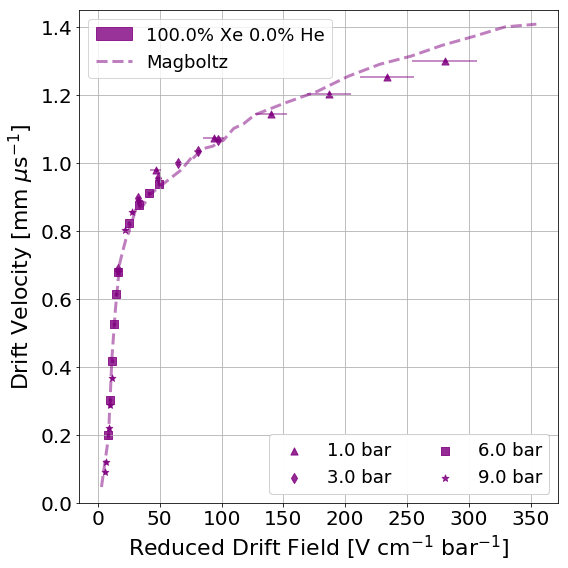

In [8]:
# 100% xenon drif velocity
plt.figure(figsize=(8,8))
x=2
lab, lab_shape, mark, E, P, R, Rerr, V, Verr, DL, DLerr = Data_Calculations(Data,x)
V =V*10

color = COL[x]
# make the patches for the symbold
Pat=[]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.8)
Pat.append(pat)
# pulling the proper magboltz 
MBX,MBY,Yer,lab = MB_V(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color=COL[x],linestyle='--',label='Magboltz')

plt.errorbar(R, V,xerr=Rerr,yerr=Verr, alpha=0.6,color=color,fmt='.')
for x, y, m, L in zip(R, V, mark,lab_shape):
    plt.scatter(x, y, alpha=0.8,marker=m,color=color,s=50,label=L+" bar") 
    
# making the legends    
Pat.append(aa)
legend1=plt.legend(handles=Pat,loc='upper left',ncol=1,fontsize=18)
plt.gca().add_artist(legend1)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='lower right',ncol=2,fontsize=18)
plt.gca().add_artist(legend2)

plt.ylim(0,1.45)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.xlabel(r'Reduced Drift Field [V cm$^{-1}$ bar$^{-1}$]',fontsize=22)
plt.ylabel(r'Drift Velocity [mm $\mu$s$^{-1}$]',fontsize=22)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/100XE00HE-VEL"+".pdf")

plt.show()

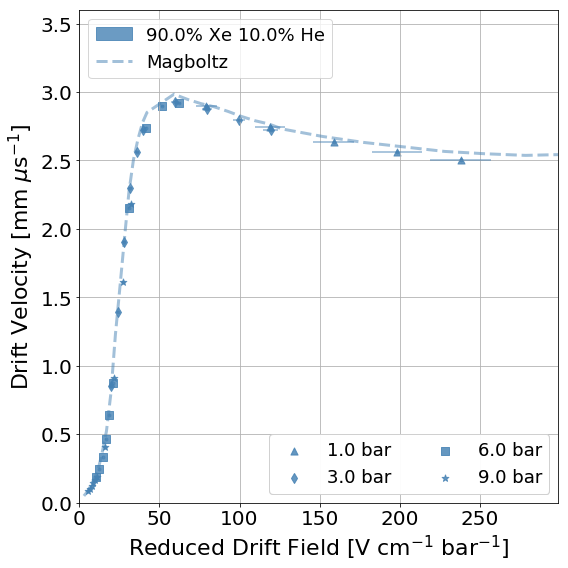

In [9]:
# 90% xenon drif velocity
plt.figure(figsize=(8,8))
x=1
lab, lab_shape, mark, E, P, R, Rerr, V, Verr, DL, DLerr = Data_Calculations(Data,x)
V =V*10

color = COL[x]
# make the patches for the symbold
Pat=[]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.8)
Pat.append(pat)
# pulling the proper magboltz 
MBX,MBY,Yer,lab = MB_V(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color=COL[x],linestyle='--',label='Magboltz')

plt.errorbar(R, V,xerr=Rerr,yerr=Verr, alpha=0.6,color=color,fmt='.')
for x, y, m, L in zip(R, V, mark,lab_shape):
    plt.scatter(x, y, alpha=0.8,marker=m,color=color,s=50,label=L+" bar") 
    
# making the legends    
Pat.append(aa)
legend1=plt.legend(handles=Pat,loc='upper left',ncol=1,fontsize=18)
plt.gca().add_artist(legend1)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='lower right',ncol=2,fontsize=18)
plt.gca().add_artist(legend2)

plt.xlim(0,299)
plt.ylim(0,3.6)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.xlabel(r'Reduced Drift Field [V cm$^{-1}$ bar$^{-1}$]',fontsize=22)
plt.ylabel(r'Drift Velocity [mm $\mu$s$^{-1}$]',fontsize=22)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/090XE10HE-VEL"+".pdf")
plt.show()

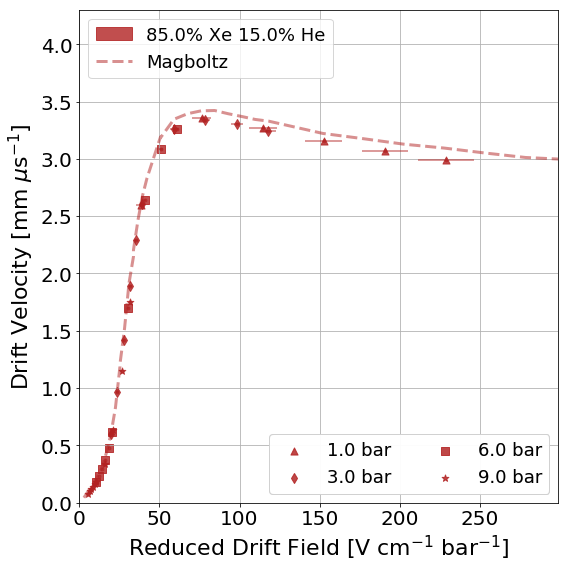

In [10]:
# 85% xenon drif velocity
plt.figure(figsize=(8,8))
x=0
lab, lab_shape, mark, E, P, R, Rerr, V, Verr, DL, DLerr = Data_Calculations(Data,x)
V =V*10

color = COL[x]
# make the patches for the symbold
Pat=[]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.8)
Pat.append(pat)
# pulling the proper magboltz 
MBX,MBY,Yer,lab = MB_V(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color=COL[x],linestyle='--',label='Magboltz')

plt.errorbar(R, V,xerr=Rerr,yerr=Verr, alpha=0.6,color=color,fmt='.')
for x, y, m, L in zip(R, V, mark,lab_shape):
    plt.scatter(x, y, alpha=0.8,marker=m,color=color,s=50,label=L+" bar") 
     
# making the legends    
Pat.append(aa)
legend1=plt.legend(handles=Pat,loc='upper left',ncol=1,fontsize=18)
plt.gca().add_artist(legend1)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='lower right',ncol=2,fontsize=18)
plt.gca().add_artist(legend2)

plt.xlim(0,299)
plt.ylim(0,4.3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.xlabel(r'Reduced Drift Field [V cm$^{-1}$ bar$^{-1}$]',fontsize=22)
plt.ylabel(r'Drift Velocity [mm $\mu$s$^{-1}$]',fontsize=22)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/090XE10HE-VEL"+".pdf")
plt.show()

In [11]:
#
# Here xdata is H Kusano 10 bar
# Here xdata1 is H Kusano 1 bar
#
ydata = np.array([1035.2102485, 2352.62259934, 2710.61508599, 2295.34380148, 1779.83462071, 1450.481533, 1207.04664208, 1135.44814476, 1135.44814476, 1063.84964743])
xdata = np.array([6.99752923,  9.33435791, 11.77311679, 14.00254669, 16.2590174, 18.62893625, 23.30874851, 28.02007787, 32.62235471, 37.2778078])
yerr  = [93.07804653, 257.75459038, 300.71368878, 236.27504118, 171.83639359, 157.51669412, 121.71744546, 157.51669412, 157.51669412, 136.03714492]
xerr  = [0.70687367, 0.97042257, 1.18612329, 1.41450378, 1.58181425, 1.83216528, 2.29242718, 2.83052125, 3.20842505, 3.7093128]

ydata1 = np.array([ 405.143472  ,  691.53746132,  992.2511501 , 1493.4406314, 1837.11341858, 2137.82710736, 2195.10590522, 2223.74530415, 1980.31041323, 1822.79371911, 1522.08003033, 1350.24363674, 1178.40724315, 1049.52994796, 1006.57084956])
xdata1 = np.array([ 6.17285059,  6.96028974,  7.95357495,  8.96817205, 10.058381, 10.92566347, 12.15614486, 12.95999085, 13.92802787, 15.04845665, 16.04356174, 17.15016567, 18.33309755, 19.2350124 , 20.02041098])
yerr1 = [ 62.05203102,  47.73233155,  47.73233155, 107.39774599, 178.99624332, 186.15609305, 176.60962674, 176.60962674, 157.51669412, 143.19699466, 157.51669412, 128.87729519, 105.01112942, 100.23789626, 100.23789626]
xerr1 = [0.37253454, 0.39567187, 0.50299237, 0.54027173, 0.6159662, 0.64337723, 0.67781644, 0.72650453, 0.8529399, 0.88143934, 0.93972603, 1.01796957, 1.13697022, 1.27030144, 1.20716751]
nextX = np.array([22.9,25.9,26.2,28.0,28.3,28.4,29.9,33.2,34.0,37.9,38.0,38.3,42.0,43.4,44.4,47.5,48.6,53.7,57.0])
nextY = np.array([1357.3, 1213.3, 1167.4, 1161.1, 1320.9, 1195.9, 1105.7, 1058.2, 1034.5, 979.1, 1129.4,
          988.6, 941.1, 939.6, 958.5, 1028.2, 901.6, 869.9, 903.2])

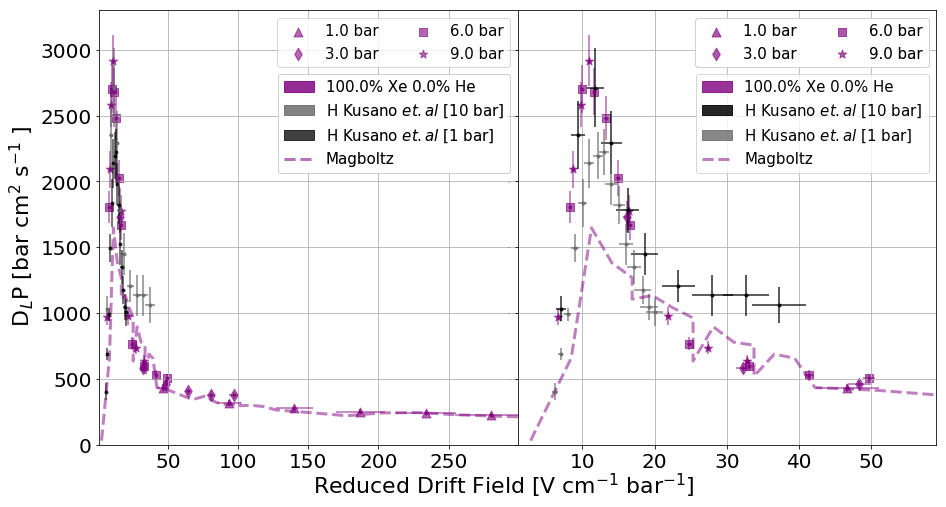

In [12]:
sigma_vac = 0.01527
fig = plt.figure(figsize=(15,8))
fig.subplots_adjust(hspace=0, wspace=0)
################################################################################
################################################################################

ax1 = fig.add_subplot(1, 2,1)
x=2
lab, lab_shape, mark, E, P, R, Rerr, V, Verr, DL, DLerr = Data_Calculations(Data,x)
V =V*10

color = COL[x]
# make the patches for the symbold
Pat=[]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.8)
Pat.append(pat)

plt.errorbar(R, DL,xerr=Rerr,yerr=DLerr, alpha=0.6,color=color,fmt='.')
# pulling in hte proper magboltz
MBX,MBY,Yer,lab = MB_DL(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color=COL[x],linestyle='--',label='Magboltz')

for x, y, m, L in zip(R, DL, mark,lab_shape):
    plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar")
#plotting other measurements
plt.errorbar(xdata,ydata,xerr=xerr,yerr=yerr,fmt='.',color='dimgrey',alpha=0.8)
lb1 = mpatches.Patch(color='dimgrey', label=r'H Kusano $\it{et. al}$ [10 bar]',alpha=0.8)

plt.errorbar(xdata1,ydata1,xerr=xerr1,yerr=yerr1,fmt='.',color='k',alpha=0.7)
lb3 = mpatches.Patch(color='k', label=r'H Kusano $\it{et. al}$ [1 bar]',alpha=0.7)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2,fontsize=15)
#making the legends
Pat.append(lb1)
Pat.append(lb3)
Pat.append(aa)
legend1=plt.legend(handles=Pat,loc='center right',bbox_to_anchor=(1, 0.74),ncol=1,fontsize=15)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(1,299)
plt.ylim(501,4900)
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

################################################################################
################################################################################

ax2 = fig.add_subplot(1, 2,2,sharey=ax1)
x=2
lab, lab_shape, mark, E, P, R, Rerr, V, Verr, DL, DLerr = Data_Calculations(Data,x)
V =V*10

color = COL[x]
# make the patches for the symbold
Pat=[]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.8)
Pat.append(pat)

plt.errorbar(R, DL,xerr=Rerr,yerr=DLerr, alpha=0.6,color=color,fmt='.')
# pulling in hte proper magboltz
MBX,MBY,Yer,lab = MB_DL(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color=COL[x],linestyle='--',label='Magboltz')

for x, y, m, L in zip(R, DL, mark,lab_shape):
    plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar")
#plotting other measurements
plt.errorbar(xdata,ydata,xerr=xerr,yerr=yerr,fmt='.',color='k',alpha=0.85)
lb1 = mpatches.Patch(color='k', label=r'H Kusano $\it{et. al}$ [10 bar]',alpha=0.85)

plt.errorbar(xdata1,ydata1,xerr=xerr1,yerr=yerr1,fmt='.',color='dimgrey',alpha=0.8)
lb3 = mpatches.Patch(color='dimgrey', label=r'H Kusano $\it{et. al}$ [1 bar]',alpha=0.8)
#making the legends
Pat.append(lb1)
Pat.append(lb3)
Pat.append(aa)
legend1=plt.legend(handles=Pat,loc='center right',bbox_to_anchor=(1, 0.74),ncol=1,fontsize=15)
plt.gca().add_artist(legend1)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2,fontsize=15)
plt.gca().add_artist(legend2)


plt.xlim(1,59)
plt.ylim(0,3300)
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=0)
fig.text(0.5, 0.04, r'Reduced Drift Field [V cm$^{-1}$ bar$^{-1}$]',fontsize=22, ha='center')
fig.text(0.04, 0.5, r" D$_L$P [bar cm$^2$ s$^{-1}$ ]",fontsize=22, va='center', rotation='vertical')
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/100XE00HE-DIFL"+".pdf")
plt.show()

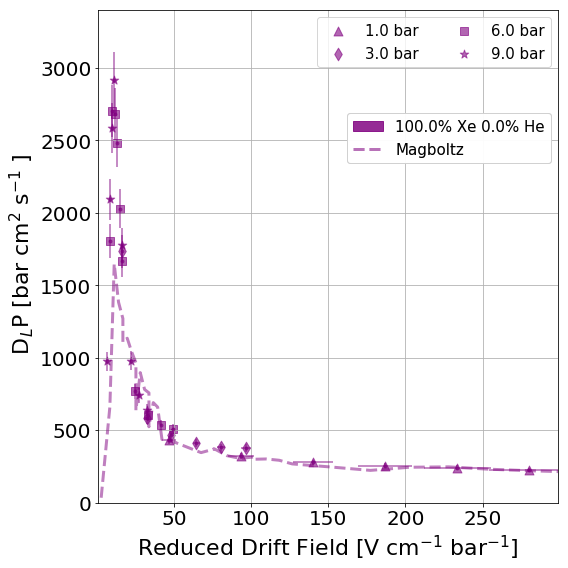

In [13]:
# 100% xenon diffusion
plt.figure(figsize=(8,8))

x=2
lab, lab_shape, mark, E, P, R, Rerr, V, Verr, DL, DLerr = Data_Calculations(Data,x)
V =V*10

color = COL[x]
# make the patches for the symbold
Pat=[]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.8)
Pat.append(pat)

plt.errorbar(R, DL,xerr=Rerr,yerr=DLerr, alpha=0.6,color=color,fmt='.')
# pulling in hte proper magboltz
MBX,MBY,Yer,lab = MB_DL(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color=COL[x],linestyle='--',label='Magboltz')

for x, y, m, L in zip(R, DL, mark,lab_shape):
    plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2,fontsize=15)

Pat.append(aa)
legend1=plt.legend(handles=Pat,loc='center right',bbox_to_anchor=(1, 0.74),ncol=1,fontsize=15)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(1,299)
plt.ylim(501,4900)
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

################################################################################

plt.ylim(0,3400)
plt.xlabel( r'Reduced Drift Field [V cm$^{-1}$ bar$^{-1}$]',fontsize=22)
plt.ylabel(r" D$_L$P [bar cm$^2$ s$^{-1}$ ]",fontsize=22,)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/090XE10HE-DIFL"+".pdf")
plt.show()

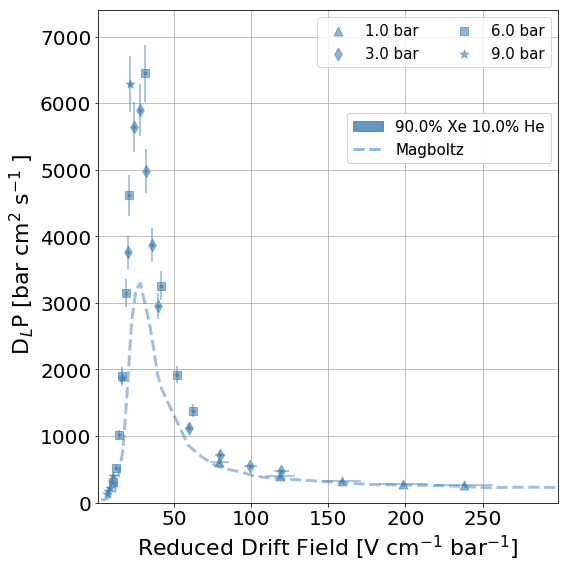

In [14]:
# 90% xenon diffusion
plt.figure(figsize=(8,8))

x=1
lab, lab_shape, mark, E, P, R, Rerr, V, Verr, DL, DLerr = Data_Calculations(Data,x)
V =V*10

color = COL[x]
# make the patches for the symbold
Pat=[]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.8)
Pat.append(pat)

plt.errorbar(R, DL,xerr=Rerr,yerr=DLerr, alpha=0.6,color=color,fmt='.')
# pulling in hte proper magboltz
MBX,MBY,Yer,lab = MB_DL(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color=COL[x],linestyle='--',label='Magboltz')

for x, y, m, L in zip(R, DL, mark,lab_shape):
    plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2,fontsize=15)

Pat.append(aa)
legend1=plt.legend(handles=Pat,loc='center right',bbox_to_anchor=(1, 0.74),ncol=1,fontsize=15)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(1,299)
plt.ylim(501,4900)
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

################################################################################

plt.ylim(0,7400)
plt.xlabel( r'Reduced Drift Field [V cm$^{-1}$ bar$^{-1}$]',fontsize=22)
plt.ylabel(r" D$_L$P [bar cm$^2$ s$^{-1}$ ]",fontsize=22,)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/090XE10HE-DIFL"+".pdf")
plt.show()

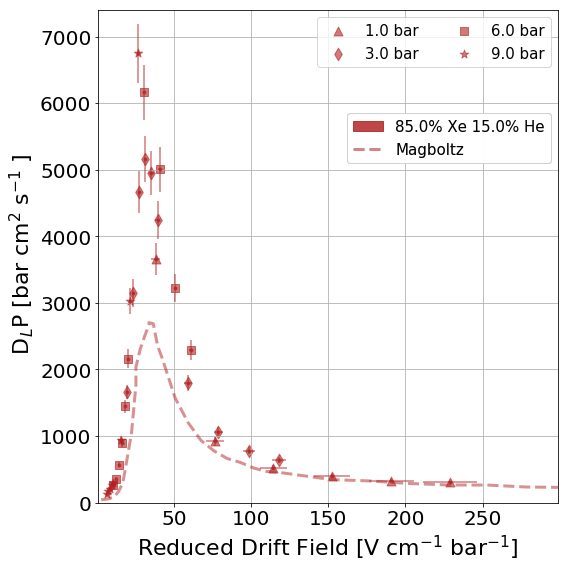

In [15]:
# 85% xenon diffusion
plt.figure(figsize=(8,8))

x=0
lab, lab_shape, mark, E, P, R, Rerr, V, Verr, DL, DLerr = Data_Calculations(Data,x)
V =V*10

color = COL[x]
# make the patches for the symbold
Pat=[]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.8)
Pat.append(pat)

plt.errorbar(R, DL,xerr=Rerr,yerr=DLerr, alpha=0.6,color=color,fmt='.')
# pulling in hte proper magboltz
MBX,MBY,Yer,lab = MB_DL(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color=COL[x],linestyle='--',label='Magboltz')

for x, y, m, L in zip(R, DL, mark,lab_shape):
    plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2,fontsize=15)

Pat.append(aa)
legend1=plt.legend(handles=Pat,loc='center right',bbox_to_anchor=(1, 0.74),ncol=1,fontsize=15)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(1,299)
plt.ylim(0,7400)
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

################################################################################

plt.ylim(0,7400)
plt.xlabel( r'Reduced Drift Field [V cm$^{-1}$ bar$^{-1}$]',fontsize=22)
plt.ylabel(r" D$_L$P [bar cm$^2$ s$^{-1}$ ]",fontsize=22,)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/090XE10HE-DIFL"+".pdf")
plt.show()

/Users/mcdonaldad/Documents/GasMixXeHeAr/Definitions.py:153: RuntimeWarning: invalid value encountered in true_divide
  Y = Dl/mu


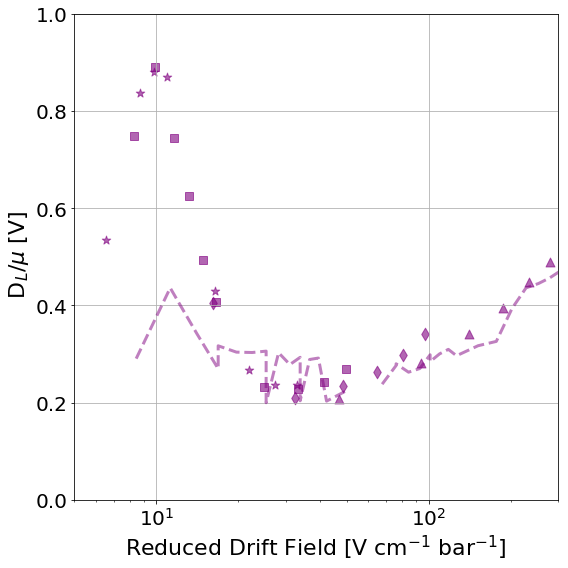

In [16]:
sigma_vac = 0.01527
plt.figure(figsize=(8,8))
################################################################################
################################################################################
Pat = []
x=2
Pc = Percents[x]
DATA = Data[Data[:,0].astype(float)==Pc]
vals = DATA[:,:-1].astype(float)
mark = DATA[:,-1]
d = 14.128
E = vals[:,1]
P = vals[:,2]
dt = vals[:,3]*1e6
# the measured sigma
sigma1_squared = (vals[:,4]*1e6)**2
# correcting it
SigCor_squared = CORRECTION_SIG(dt,P,E,sigma1_squared)
# the corrected one
sigma_squared = sigma1_squared-SigCor_squared-(sigma_vac)**2
#correcting V
dt_new = CORRECTION_V(dt,P,E)
V = d/(dt_new)
R = E/P
Dslash = sigma_squared*V**3/(2*d)*1e6*P
# finding the errors
B = (.062)**2+(3*4.6e-3)**2+(2*0.01)**2
DeltaD = Dslash*np.sqrt((B))
B = (.1/(E))**2+(0.1/(P))**2
xer = R*np.sqrt((B))
# making the label
lab = str(Pc)+'% Xe '+str(100-Pc)+'% He'
color = COL[x]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
Pat.append(pat)
LABB = np.rint(P).astype(str)
MU = (V*1e6)/E
DL = sigma_squared*V**3/(2*d)*1e6
#plt.scatter(R,DL/MU)
#plt.errorbar(R, Dslash,xerr=xer,yerr=DeltaD, alpha=0.6,color=color,fmt='.')
# pulling in hte proper magboltz
MBX,MBY,Yer,lab = MB_eff_EleL(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color=COL[x],linestyle='--',label='Magboltz')

for x, y, m, L in zip(R,DL/MU, mark,LABB):
    plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar")


#handles, labels = plt.gca().get_legend_handles_labels()
#by_label = OrderedDict(zip(labels[1:], handles[1:]))
#legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2,fontsize=15)

#Pat.append(aa)
#legend1=plt.legend(handles=Pat,loc='center right',bbox_to_anchor=(1, 0.74),ncol=1,fontsize=15)
#plt.gca().add_artist(legend1)
#plt.gca().add_artist(legend2)


plt.xlim(1,299)
#plt.xlim(1,50)
plt.ylim(0,1)
plt.xlim(5,299)
plt.semilogx()
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
################################################################################

plt.xlabel( r'Reduced Drift Field [V cm$^{-1}$ bar$^{-1}$]',fontsize=22)
plt.ylabel(r" D$_L$/$\mu$ [V]",fontsize=22,)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/090XE10HE-DIFL"+".pdf")
plt.show()

In [25]:
#############################################################################
#######
####### Now to do the transverse diffusion calculation
#######
#############################################################################

In [26]:
def Data_Calculations(Data,x):
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 14.128
    E = vals[:,1]
    P = vals[:,2]
    dt = vals[:,3]*1e6
    # the measured sigma
    sigma1_squared = (vals[:,4]*1e6)**2
    # correcting it
    SigCor_squared = CORRECTION_SIG(dt,P,E,sigma1_squared)
    # the corrected one
    sigma_squared = sigma1_squared-SigCor_squared-(sigma_vac)**2
    #correcting V
    dt_new = CORRECTION_V(dt,P,E)
    V = d/(dt_new)
    R = E/P
    Dslash = sigma*V**3/(2*d)*1e6*P

    B = (.062)**2+(3*4.6e-3)**2+(2*0.01)**2
    DeltaD = Dslash*np.sqrt((B))
    
    return E, P, R, V, Dslash
    

In [27]:
###########################################################################################
####################################################
##########################
x=2
Pc = Percents[x]
DATA = Data[Data[:,0].astype(float)==Pc]
vals = DATA[:,:-1].astype(float)
mark = DATA[:,-1]
d = 14.128
E = vals[:,1]
P = vals[:,2]
dt = vals[:,3]*1e6
# the measured sigma
sigma1_squared = (vals[:,4]*1e6)**2
# correcting it
SigCor_squared = CORRECTION_SIG(dt,P,E,sigma1_squared)
# the corrected one
sigma_squared = sigma1_squared-SigCor_squared-(sigma_vac)**2
#correcting V
dt_new = CORRECTION_V(dt,P,E)
V = d/(dt_new)
R = E/P
Dslash = sigma_squared*V**3/(2*d)*1e6*P

B = (.062)**2+(3*4.6e-3)**2+(2*0.01)**2
DeltaD = Dslash*np.sqrt((B))

SORT = R.argsort()
Dslash =Dslash[SORT]
dell = np.where(Dslash>6000)[0]
Dslash = np.delete(Dslash,dell)
sigma_squared = np.delete(sigma_squared[SORT],dell)
R = np.delete(R[SORT],dell)
E = np.delete(E[SORT],dell)
P = np.delete(P[SORT],dell)
V = np.delete(V[SORT],dell)
DeltaD = np.delete(DeltaD[SORT],dell)



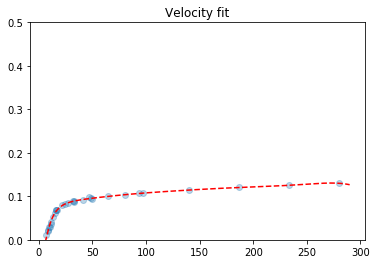

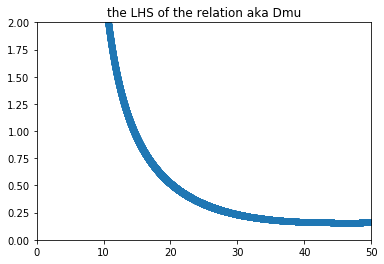

/Users/mcdonaldad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in sqrt
/Users/mcdonaldad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in sqrt


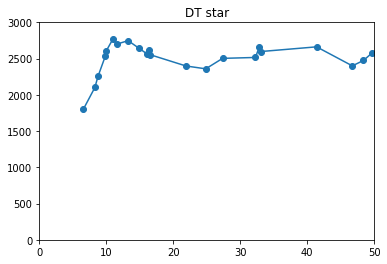

In [28]:
##################################################
#velocity fit
plt.title("Velocity fit")
plt.scatter(R,V,alpha=0.3)
xt = np.linspace(6,290,100000)
cof = np.polyfit(R,R**2*V,9)
fit = np.poly1d(cof)
velx = xt
vely = fit(xt)/xt**2

plt.plot(velx,vely,'--r')
#plt.xlim(0,50)
plt.ylim(0,0.5)
plt.show()
##################################################
#finding the D mu
#Dmu = (velx/(vely))*np.gradient(vely,velx)
plt.title("the LHS of the relation aka Dmu")
Dmu = (velx/(vely))[1:]*(vely[1:]-vely[:-1])/(velx[1]-velx[0])
plt.scatter(velx[1:],Dmu,alpha=0.3)
plt.ylim(0,2)
plt.xlim(0,50)

plt.show()
##################################################
## finding the velx index that matches R
DEX = []
for q in range(0,len(R)):
    hold = find_nearest(velx,R[q])
    ll = np.where(velx==hold)[0][0]
    DEX.append(ll)
DEX = np.array(DEX)
DEX

##################################################
## 
DL = Dslash/P#(sigma_squared*V**3*1e6)/(2*d)
DT = DL/Dmu[DEX]
DDD = np.sqrt(2*(DT)/(vely[DEX]))*10
DTstar = np.sqrt(2*(DT)/(vely[DEX]))*10*np.sqrt(P)
plt.title("DT star")

plt.plot(R,DTstar)
plt.scatter(R,DTstar)
plt.ylim(0,3000)
plt.xlim(0,50)
plt.show()

In [29]:
########################################################################
############
############ Now Puttign the above into a function
############
########################################################################
def DTransverse_calc(Data,x):
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 14.128
    E = vals[:,1]
    P = vals[:,2]
    dt = vals[:,3]*1e6
    # the measured sigma
    sigma1_squared = (vals[:,4]*1e6)**2
    # correcting it
    SigCor_squared = CORRECTION_SIG(dt,P,E,sigma1_squared)
    # the corrected one
    sigma_squared = sigma1_squared-SigCor_squared-(sigma_vac)**2
    #correcting V
    dt_new = CORRECTION_V(dt,P,E)
    V = d/(dt_new)
    R = E/P
    Dslash = sigma_squared*V**3/(2*d)*1e6*P

    B = (.062)**2+(3*4.6e-3)**2+(2*0.01)**2
    DeltaD = Dslash*np.sqrt((B))

    SORT = R.argsort()
    Dslash =Dslash[SORT]
    dell = np.where(Dslash>6000)[0]
    Dslash = np.delete(Dslash,dell)
    sigma_squared = np.delete(sigma_squared[SORT],dell)
    R = np.delete(R[SORT],dell)
    E = np.delete(E[SORT],dell)
    P = np.delete(P[SORT],dell)
    V = np.delete(V[SORT],dell)
    DeltaD = np.delete(DeltaD[SORT],dell)

    ##################################################
    #velocity fit
    xt = np.linspace(6,290,100000)
    cof = np.polyfit(R,R**2*V,9)
    fit = np.poly1d(cof)
    velx = xt
    vely = fit(xt)/xt**2
    ##################################################
    #finding the D mu
    #Dmu = (velx/(vely))*np.gradient(vely,velx)
    Dmu = (velx/(vely))[1:]*(vely[1:]-vely[:-1])/(velx[1]-velx[0])
    ##################################################
    ## finding the velx index that matches R
    DEX = []
    for q in range(0,len(R)):
        hold = find_nearest(velx,R[q])
        ll = np.where(velx==hold)[0][0]
        DEX.append(ll)
    DEX = np.array(DEX)
    DEX
    ##################################################
    ## 
    DL = Dslash/P#(sigma_squared*V**3*1e6)/(2*d)
    DT = DL/Dmu[DEX]
    DDD = np.sqrt(2*(DT)/(vely[DEX]))*10
    DTstar = np.sqrt(2*(DT)/(vely[DEX]))*10*np.sqrt(P)
    return R,DTstar

In [30]:
ExtrapErr85=0.046264710792741436
ExtrapErr90=0.12370092141967926

B = (.062)**2+(3*4.6e-3)**2+(2*0.01)**2
DERROR = np.sqrt((B))

Next9=np.loadtxt("NEXT_Trans_9.csv",delimiter=',')
Next7=np.loadtxt("NEXT_Trans_7.csv",delimiter=',')

/Users/mcdonaldad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in sqrt
/Users/mcdonaldad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in sqrt


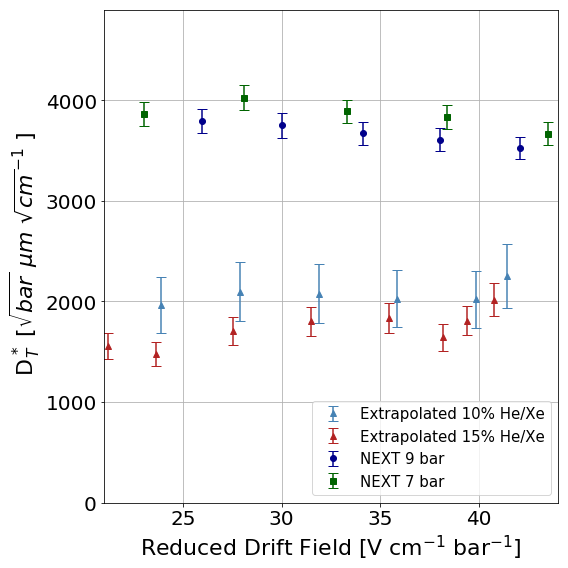

In [31]:
fig = plt.figure(figsize=(8,8))
R90, DT90 = DTransverse_calc(Data,1)
DT90err = (DT90*np.sqrt(DERROR**2+ExtrapErr90**2))
plt.errorbar(R90,DT90,yerr=DT90err,label='Extrapolated 10% He/Xe',fmt='^',color=COL[1],capsize=5)
# 
R85, DT85 = DTransverse_calc(Data,0)
DT85err = (DT85*np.sqrt(DERROR**2+ExtrapErr85**2))
plt.errorbar(R85,DT85,yerr=DT85err,label='Extrapolated 15% He/Xe',fmt='^',color=COL[0],capsize=5)

plt.errorbar(Next9[:,0],Next9[:,1],yerr=Next9[:,2],label="NEXT 9 bar",fmt='o',color='DarkBlue',capsize=5)
plt.errorbar(Next7[:,0],Next7[:,1],yerr=Next7[:,2],label="NEXT 7 bar",fmt='s',color='DarkGreen',capsize=5)

plt.legend(loc='lower right',fontsize=15)
plt.xlim(21,44)
plt.ylim(0,4900)

plt.xlabel( r'Reduced Drift Field [V cm$^{-1}$ bar$^{-1}$]',fontsize=22)
plt.ylabel(r" D$^*_T$ [$\sqrt{bar}$ $\mu m$ $\sqrt{cm}^{-1}$ ]",fontsize=22)

plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/Trans-extrap"+".pdf",bbox_inches='tight')
plt.show()